<a href="https://colab.research.google.com/github/Moinkhan99ds/Customer-Churn-Prediction-Project/blob/main/cust_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import & Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (7).zip to archive (7) (1).zip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('archive (7).zip')

Data inforamation

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CreditScore        10002 non-null  int64
 1   Age                10002 non-null  int64
 2   Tenure             10002 non-null  int64
 3   Balance            10002 non-null  int64
 4   NumOfProducts      10002 non-null  int64
 5   HasCrCard          10002 non-null  int64
 6   IsActiveMember     10002 non-null  int64
 7   EstimatedSalary    10002 non-null  int64
 8   Exited             10002 non-null  int64
 9   Geography_Germany  10002 non-null  int64
 10  Geography_Spain    10002 non-null  int64
 11  Gender_Male        10002 non-null  int64
dtypes: int64(12)
memory usage: 937.8 KB


Data Cleaning

In [ ]:
df= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1
IsActiveMember,1
EstimatedSalary,0


EDA(Exploratory Data Analysis)

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['HasCrCard']=df['HasCrCard'].fillna(df['HasCrCard'].mode()[0])
df['IsActiveMember']=df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0])

In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,1
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Text(0.5, 1.0, 'Churn Distribution')

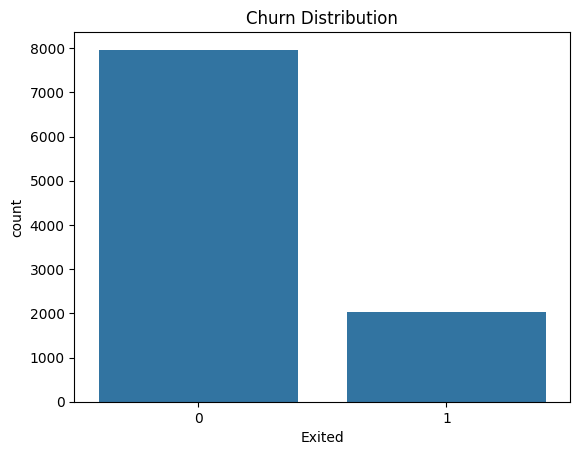

In [ ]:
df['Exited'].value_counts(normalize=True)*100
sns.countplot(x='Exited',data=df)
plt.title('Churn Distribution')

<Axes: xlabel='Exited', ylabel='Age'>

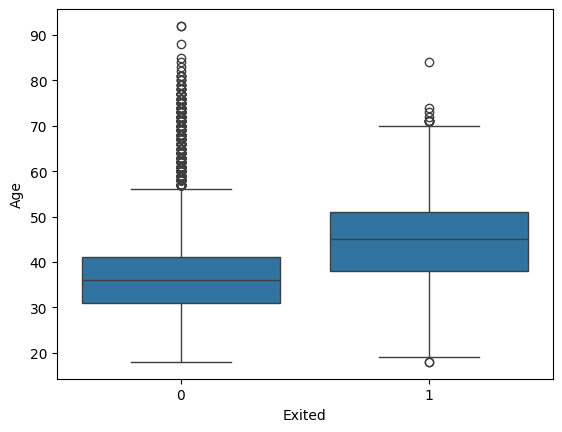

In [ ]:
sns.boxplot(x='Exited',y='Age',data=df)

<Axes: xlabel='Geography', ylabel='count'>

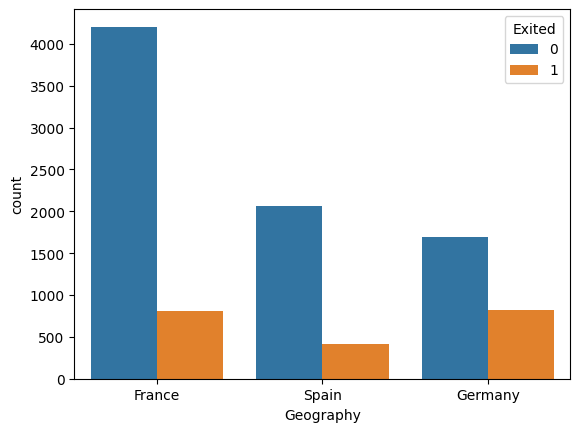

In [ ]:
sns.countplot(x='Geography',hue='Exited',data=df)

<Axes: xlabel='CreditScore', ylabel='Count'>

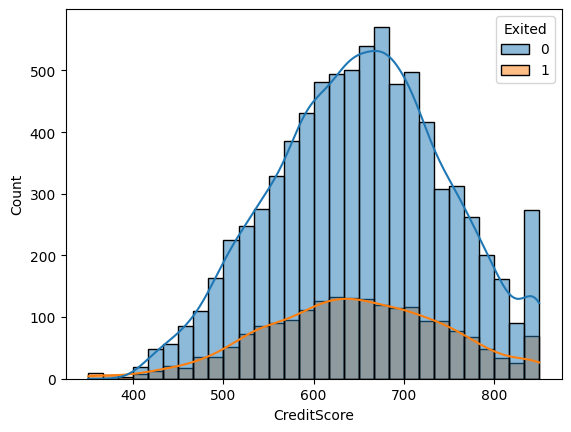

In [ ]:
sns.histplot(data=df,x='CreditScore',hue='Exited',bins=30,kde=True)

Feature Engineering

In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
4,850,43.0,2,125510.82,1,1.0,1.0,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,False,False,False
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,True,False,True
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,True,False,True
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0,False,False,False


In [ ]:
df=df.astype(int)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1
9999,772,42,3,75075,2,1,0,92888,1,1,0,1
10000,792,28,4,130142,1,1,0,38190,0,0,0,0


<Axes: >

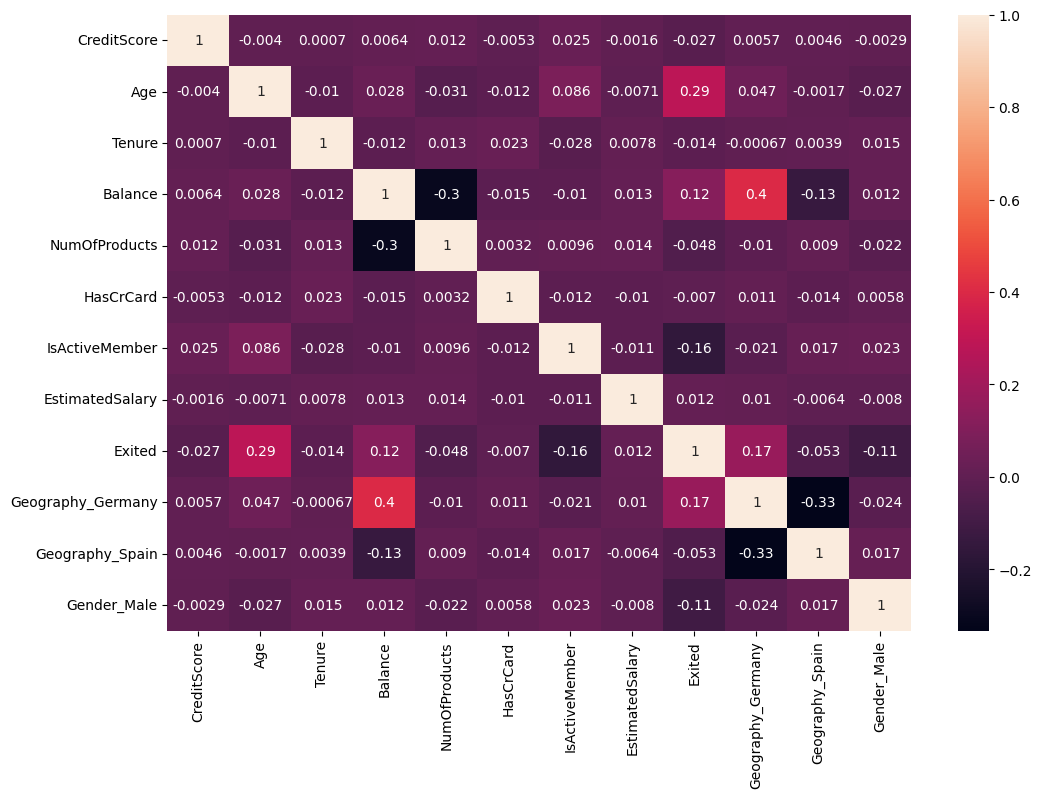

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X=df.drop('Exited',axis=1)
Y=df['Exited']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(X)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

Base line Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
accuracy_score(y_test, y_pred)

0.809095452273863

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.96      0.89      1599\n           1       0.57      0.21      0.31       402\n\n    accuracy                           0.81      2001\n   macro avg       0.70      0.59      0.60      2001\nweighted avg       0.78      0.81      0.77      2001\n'

Advanced Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
modelg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
modelg.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_predg = modelg.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predg)

0.8650674662668666

In [ ]:
modelx = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,use_lable_encoder=False, eval_metric='mlogloss',random_state=42)

In [ ]:
modelx.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:37:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_predx = modelx.predict(x_test)

In [ ]:
accuracy_score(y_predx, y_test)

0.8640679660169915

In [ ]:
classification_report(y_test, y_predx)

'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92      1599\n           1       0.74      0.49      0.59       402\n\n    accuracy                           0.86      2001\n   macro avg       0.81      0.73      0.76      2001\nweighted avg       0.85      0.86      0.85      2001\n'

Evalution Visualization

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

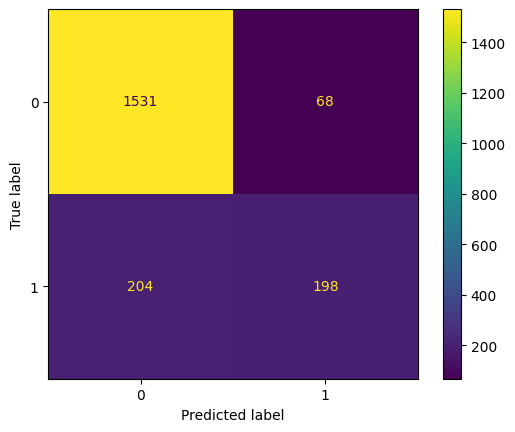

In [ ]:
ConfusionMatrixDisplay.from_estimator(modelx, x_test, y_test)

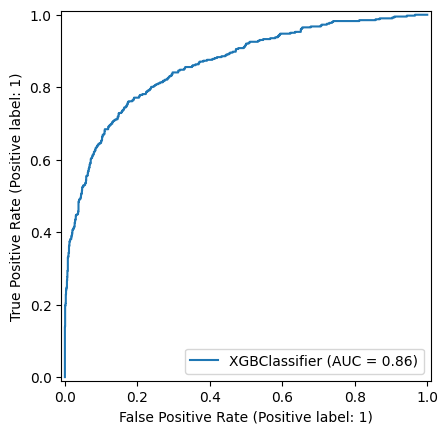

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(modelx, x_test, y_test)

Text(0.5, 1.0, 'Feature Importances')

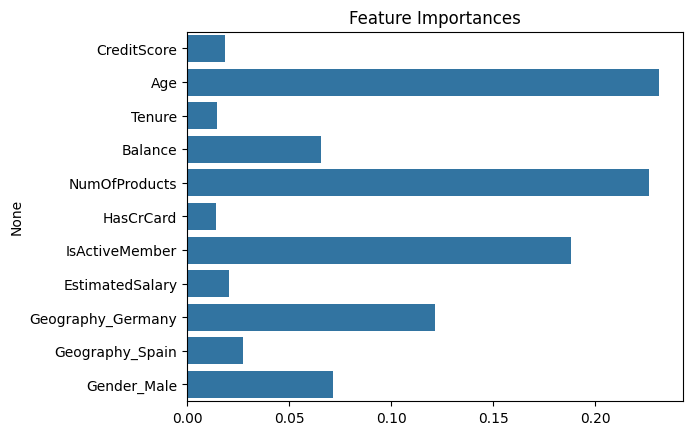

In [ ]:
importances = modelx.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances")

Explainability

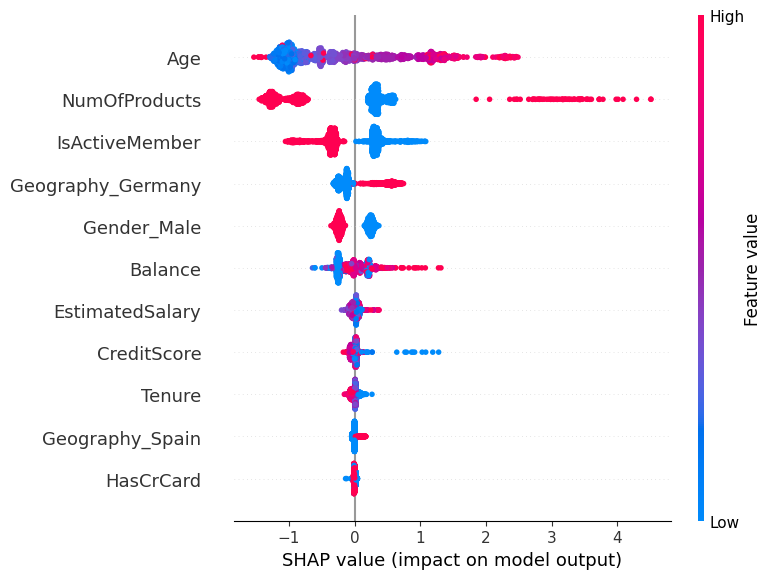

In [ ]:
import shap
explainer = shap.TreeExplainer(modelx)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, feature_names=X.columns)
